In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

# Creating your first machine learning model with Scikit-Learn

Creating your first machine learning model with Scikit-Learn

Scikit-learn : https://scikit-learn.org/

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print('Shape of images: {}'.format(digits.images.shape))

Shape of images: (1797, 8, 8)


In [5]:
print('X (Examples) : {}'.format(digits.data.shape))

X (Examples) : (1797, 64)


In [6]:
print('Y (Labels) : {}'.format(digits.target.shape))

Y (Labels) : (1797,)


In [7]:
print('Set of output classes: {{{}}}'.format(digits.target_names))

Set of output classes: {[0 1 2 3 4 5 6 7 8 9]}


Feature matrix $X\in{\rm I\!R}^{m, n}$, $Y\in{\rm I\!R}^{m}$; $m=1797$ samples, $n=64$ feature dimensions

In [8]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


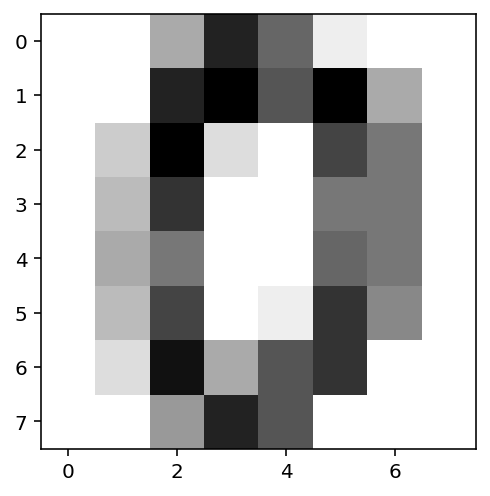

In [9]:
plt.figure()
plt.imshow(16 - digits.images[0], cmap='gray')

In [10]:
print('Label for above image: {}'.format(digits.target[0]))

Label for above image: 0


# Ridge Regression model 

https://en.wikipedia.org/wiki/Tikhonov_regularization

https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf
## $y=wx_i$ where $w\in{\rm I\!R}^{n}$
i.e. if dimensions $n=2$;    $y_{i} = f(x_{i}) = \begin{bmatrix} w_{0}, w_{1} \end{bmatrix} \begin{bmatrix} x_{0} \\ x_{1} \end{bmatrix} = w_{0}x_{0} + w_{1}x_{1}$

$\hat{y}=\mathbf{X}w$
<br>
<br>

## Ridge Regression cost function 
$$ J(w)= \sum_i (w^T x_i - y_i)^2 = {\bf ||} \mathbf{X} w-y {\bf ||}^2_{2} $$

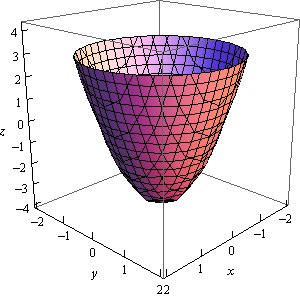

$$\min_{w} \, (\mathbf{y} - \mathbf{X} w)^\mathsf{T}(\mathbf{y} - \mathbf{X} w) $$

$$\frac{\partial (\mathbf{y} - \mathbf{X} w)^\mathsf{T}(\mathbf{y} - \mathbf{X} w)}{\partial w}=-2X^T(y-\mathbf{X} w)$$

$$\frac{\partial (\mathbf{y} - \mathbf{X} w)^\mathsf{T}(\mathbf{y} - \mathbf{X} w)}{\partial w}=-2X^T(y-\mathbf{X} w) = 0$$

$$y=\mathbf{X} w$$

$$w = \mathbf{X}^{-1} y$$

In [11]:
# Split the labelled dataset into a training set and test set
index_to_split = -1

X_train = digits.data[:index_to_split]
y_train = digits.target[:index_to_split]

X_test = digits.data[index_to_split:]
y_test = digits.target[index_to_split:]

## Modelling in Numpy

In [12]:
# Train model y = Xw
X_train_inv = np.linalg.pinv(X_train)
w = np.dot(X_train_inv, y_train)
print('w: {}'.format(w))

w: [-2.28119225e-15  9.40249350e-02 -3.67939617e-03 -7.72167429e-03
  7.49514697e-02  1.15243563e-02 -2.72158636e-02 -7.31904304e-03
  1.00102690e+00 -2.84132215e-02  1.18887868e-01  6.59994113e-02
 -5.58787175e-02 -7.04137172e-02  9.65429164e-02  2.56033005e-01
 -7.29405068e-01  2.40605548e-02  7.76124220e-02 -2.29357716e-02
 -5.66039721e-02  5.81134072e-02 -4.91673806e-02 -2.62755693e-01
 -9.08254598e-01 -1.49425933e-01  5.59359249e-02  8.97465435e-02
  8.39772547e-02  9.83482587e-02  1.86692450e-03 -2.97298764e+00
 -1.62269976e-14 -1.54851687e-01 -8.97570476e-03  1.39494684e-01
 -3.67398683e-02  5.46737441e-02 -9.53756017e-03 -8.03783039e-15
  1.00930061e-01  1.23968401e-01 -1.37042140e-02  5.34285543e-03
  1.30949507e-01  5.51389202e-02  2.24650594e-02  7.76787978e-03
  6.14807150e-01  2.67348801e-02  1.20233616e-03 -6.19644555e-02
 -2.06960828e-01 -3.39245068e-02  1.05783054e-01 -1.40682284e-01
 -1.01420937e+00 -1.13249749e-01  2.06527116e-02 -4.39417720e-02
  1.85650152e-02 -6.65

y_hat: [9.30939946], rounds to 9
Actual y label: [8]


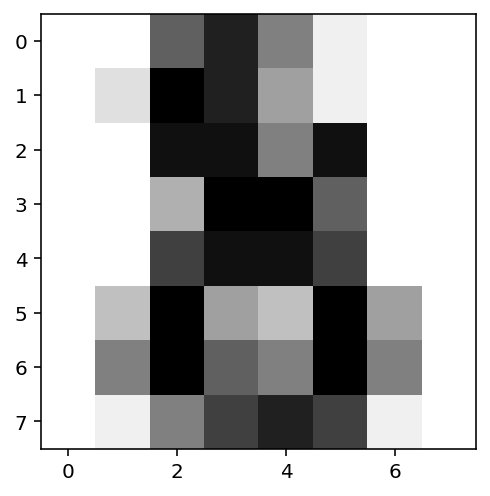

In [13]:
# Test model
y_hat = X_test @ w
print('y_hat: {}, rounds to {}'.format(y_hat, int(np.round(y_hat)[0])))
print('Actual y label: {}'.format(y_test))
plt.figure()
plt.imshow(16 - digits.images[-1], cmap='gray')

## With Scikit-Learn

In [14]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0)

In [15]:
reg.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

y_hat: [8.73804868], rounds to 9
Actual y label: [8]


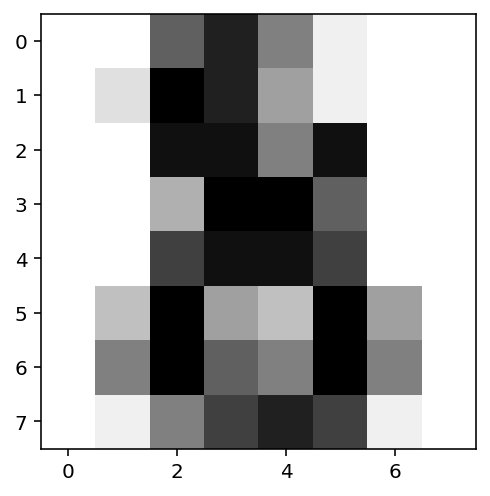

In [16]:
y_hat = reg.predict(X_test)
print('y_hat: {}, rounds to {}'.format(y_hat, int(np.round(y_hat)[0])))
print('Actual y label: {}'.format(y_test))
plt.figure()
plt.imshow(16 - digits.images[-1], cmap='gray')

In [17]:
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_huber',
 '_least_angle',
 '_logistic',
 '_omp',
 '_passive_aggressive',
 '_perceptron',
 '_ransac',
 '_ridge',
 '_sag',
 '_

In [18]:
# Documentation on the model
print(reg.__doc__)

Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

    Read more in the :ref:`User Guide <ridge_regression>`.

    Parameters
    ----------
    alpha : {float, ndarray of shape (n_targets,)}, default=1.0
        Regularization strength; must be a positive float. Regularization
        improves the conditioning of the problem and reduces the variance of
        the estimates. Larger values specify stronger regularization.
        Alpha corresponds to ``C^-1`` in other linear models such as
        LogisticRegression or LinearSVC. If an array is passed, penalties are
   

In [19]:
print('w: {}'.format(reg.coef_))
print('Shape {}'.format(reg.coef_.shape))

w: [-5.64361534e+13  1.37530143e-01 -3.64724634e-03 -8.27022484e-03
  6.13728748e-02 -2.04166835e-02 -6.53482332e-03  5.55815748e-02
  1.77335806e+00 -5.20006856e-02  1.16527620e-01  4.56980228e-02
 -6.95224716e-02 -5.78517511e-02  9.72116633e-02  1.09081886e-01
 -9.95272005e-01  3.60096056e-02  7.08214345e-02 -2.69839722e-02
 -7.21444476e-02  4.48732443e-02 -9.18408762e-02 -5.77045782e-02
 -1.54096064e+00 -1.87986249e-01  4.30050090e-02  8.00514971e-02
  7.73220503e-02  8.90310072e-02  3.42388366e-03 -2.88785429e+00
 -6.50143647e+13 -9.41027930e-02 -3.36438284e-02  1.43253935e-01
 -6.19287462e-02  4.45251030e-02 -4.98314077e-02  6.67553014e+13
 -1.11865788e-01  1.00848937e-01 -3.03298969e-02  4.00432754e-03
  1.21240361e-01  4.98525496e-02  2.80670807e-02  3.00484447e-01
  4.81295608e-01  4.20789961e-02 -1.15768461e-03 -7.68555102e-02
 -2.00680184e-01 -3.67612934e-02  1.01791074e-01 -1.82111055e-01
 -1.42101961e+00 -1.67359821e-01 -8.76702593e-03 -7.71823803e-02
 -1.13506784e-02 -6.53